# Pneumonia Detection CNN

Importing modules

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.models import load_model, Sequential

Load datasets from data directory and scale

In [18]:
testData = tf.keras.utils.image_dataset_from_directory('data/test')
trainData = tf.keras.utils.image_dataset_from_directory('data/train')
valData = tf.keras.utils.image_dataset_from_directory('data/val')

testData = testData.map(lambda x, y: (x / 255, y))
trainData = trainData.map(lambda x, y: (x / 255, y))
valData = valData.map(lambda x, y: (x / 255, y))

Found 624 files belonging to 2 classes.


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


Set data pipelines



In [19]:
testSize = int(len(testData))
trainSize = int(len(trainData))
valSize = int(len(valData))
test = testData.take(testSize)
train = trainData.take(trainSize)
val = valData.take(valSize)

Build Convolutional Neural Network

In [20]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

Set logs output directory

In [21]:
logDir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logDir)

Visualisations

Epoch 1/7


163/163 [==============================] - 75s 453ms/step - loss: 0.2702 - accuracy: 0.8848 - val_loss: 0.2053 - val_accuracy: 0.8750
Epoch 2/7
163/163 [==============================] - 76s 463ms/step - loss: 0.0958 - accuracy: 0.9661 - val_loss: 0.6485 - val_accuracy: 0.6875
Epoch 3/7
163/163 [==============================] - 75s 457ms/step - loss: 0.0859 - accuracy: 0.9699 - val_loss: 0.1283 - val_accuracy: 0.9375
Epoch 4/7
163/163 [==============================] - 75s 455ms/step - loss: 0.0696 - accuracy: 0.9734 - val_loss: 0.0593 - val_accuracy: 1.0000
Epoch 5/7
163/163 [==============================] - 75s 457ms/step - loss: 0.0478 - accuracy: 0.9831 - val_loss: 0.2591 - val_accuracy: 0.8125
Epoch 6/7
163/163 [==============================] - 75s 452ms/step - loss: 0.0450 - accuracy: 0.9847 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 7/7
163/163 [==============================] - 78s 474ms/step - loss: 0.0341 - accuracy: 0.9875 - val_loss: 0.0312 - val_accuracy: 1.0000


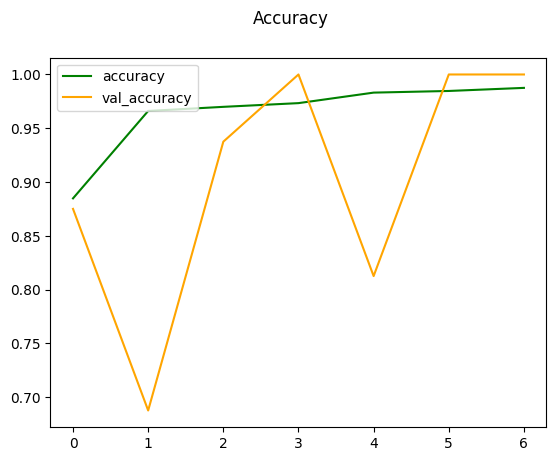

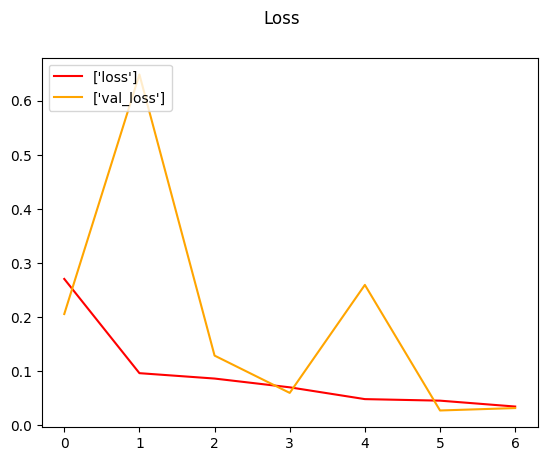

In [22]:
# Declare modelHistory to allow for creating visualisations of training
modelHistory = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

# Visualisation of accuracy
figureAccuracy = plt.figure()
plt.plot(modelHistory.history['accuracy'], color='green', label='accuracy')
plt.plot(modelHistory.history['val_accuracy'], color='orange', label='val_accuracy')
figureAccuracy.suptitle('Accuracy')
plt.legend(loc="upper left")
plt.show()

# Visualisation of loss
figureLoss = plt.figure()
plt.plot(modelHistory.history['loss'], color='red', label=['loss'])
plt.plot(modelHistory.history['val_loss'], color='orange', label=['val_loss'])
figureLoss.suptitle('Loss')
plt.legend(loc="upper left")
plt.show()

Evaluate

In [23]:
accuracy = BinaryAccuracy()
precision = Precision()
recall = Recall()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    accuracy.update_state(y, yhat)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)

print(f'Accuracy: {accuracy.result().numpy()}\nPrecision: {precision.result().numpy()}\nRecall: {recall.result().numpy()}')

1/1 [==============================] - 0s 103ms/step
Accuracy: 0.7852563858032227
Precision: 0.7490272521972656
Recall: 0.9871794581413269


Save model

In [24]:
model.save(os.path.join('models', 'pneumonia-detection-cnn.h5'))